<a href="https://colab.research.google.com/github/rammy3230/Loan-Prediction-Using-ML-Classifiers/blob/main/Adv_Data_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Loan prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.shape

(542, 13)

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


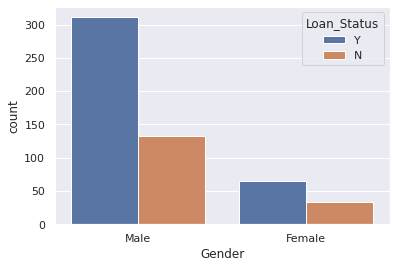

In [ ]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])
print(pd.crosstab(df['Gender'],df['Loan_Status']))

Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


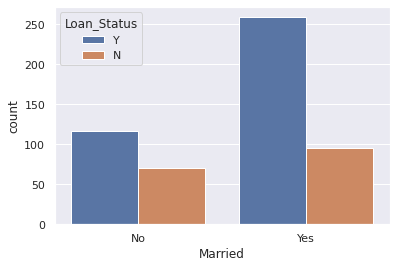

In [ ]:
sns.countplot(df['Married'],hue=df['Loan_Status'])
print(pd.crosstab(df['Married'],df['Loan_Status']))

Loan_Status     N    Y
Education             
Graduate      122  303
Not Graduate   44   73


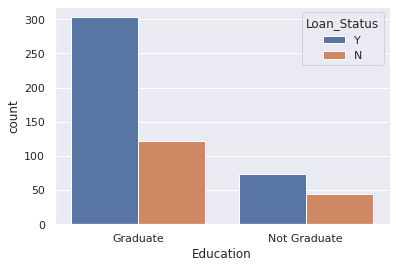

In [ ]:
sns.countplot(df['Education'],hue=df['Loan_Status'])
print(pd.crosstab(df['Education'],df['Loan_Status']))

Loan_Status      N    Y
Self_Employed          
No             141  326
Yes             25   50


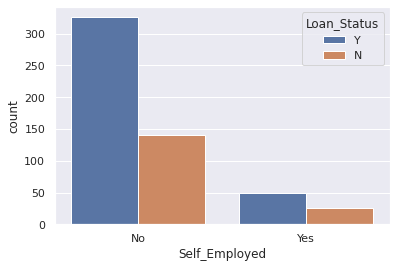

In [ ]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


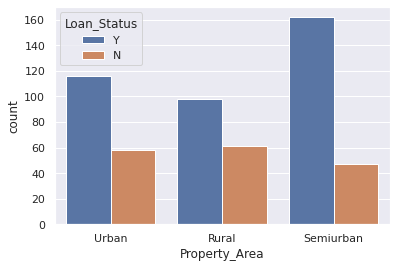

In [ ]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

In [ ]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [ ]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [ ]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [ ]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [ ]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [ ]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [ ]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [ ]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [ ]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
df['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

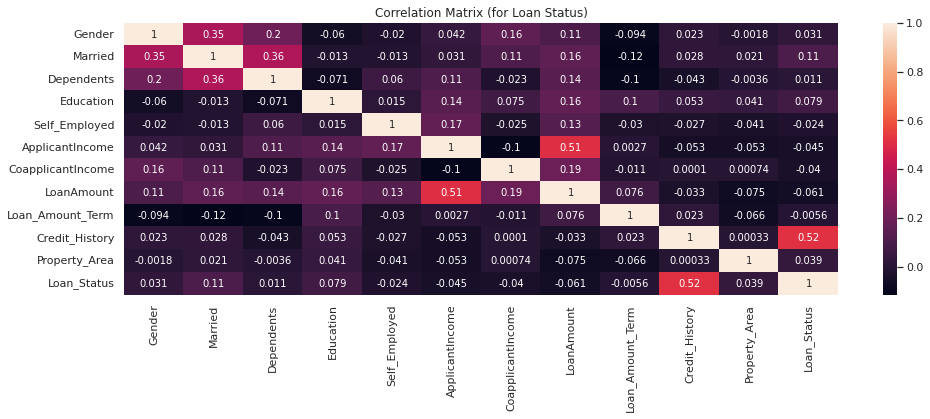

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

In [ ]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print(X_train)

[[  1.   1.   3. ... 360.   1.   1.]
 [  1.   0.   0. ... 360.   1.   2.]
 [  1.   1.   0. ... 360.   0.   2.]
 ...
 [  0.   0.   1. ... 360.   1.   1.]
 [  1.   1.   1. ... 360.   1.   1.]
 [  0.   1.   0. ... 360.   1.   1.]]


In [ ]:
print(X_test)


[[  1.   0.   0. ... 360.   1.   1.]
 [  1.   1.   1. ... 360.   0.   0.]
 [  1.   0.   0. ... 360.   1.   1.]
 ...
 [  0.   0.   0. ... 360.   1.   1.]
 [  1.   1.   0. ... 360.   1.   1.]
 [  1.   1.   2. ... 360.   1.   2.]]


In [ ]:
print(y_train)

[1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1
 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0
 1 1 1 1 1 0 1 1]


In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_predict = DT.predict(X_test)
print(classification_report(y_test, y_predict))
DT_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.51      0.49      0.50        51
           1       0.77      0.79      0.78       112

    accuracy                           0.69       163
   macro avg       0.64      0.64      0.64       163
weighted avg       0.69      0.69      0.69       163

accuracy is 0.6932515337423313
69.33% Accurate


In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)
print(classification_report(y_test, y_predict))
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))
print(f"{round(LR_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.80      0.39      0.53        51
           1       0.78      0.96      0.86       112

    accuracy                           0.78       163
   macro avg       0.79      0.67      0.69       163
weighted avg       0.78      0.78      0.75       163

accuracy is 0.7791411042944786
77.91% Accurate


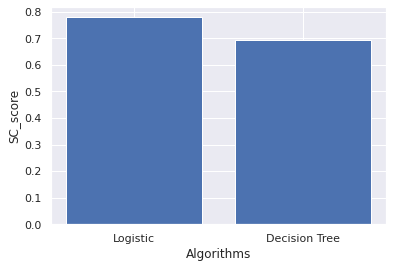

In [ ]:
plt.bar(['Logistic','Decision Tree'],[LR_SC,DT_SC])
plt.xlabel("Algorithms")
plt.ylabel("SC_score")
plt.show()